In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.arff


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

# Importing Dataset

In [3]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
dataset = pd.read_excel('/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# Visualizing Dataset

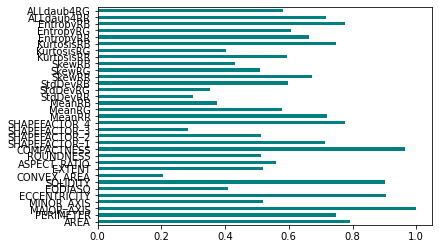

In [5]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, dataset.columns[0:len(dataset.columns)-2])
feat_importances.plot(kind='barh', color='teal')
plt.show()

# Feature Selection

In [6]:
X = dataset.iloc[:,[0,1,2,3,4,5,7,9,10,11,12,13,14,16,17,18,22,23,25,26,28,29,30,31,32,33]]
X.head

<bound method NDFrame.head of        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     CONVEX_AREA  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  ...  SkewRR  SkewRG  \
0 

# Removing Categorical Data

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting Dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training Model

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
lclassifier = LogisticRegression(max_iter=1000)
lclassifier.fit(X_train, y_train)
y_lpred = lclassifier.predict(X_test)
accuracy_score(y_test, y_lpred)

0.9022222222222223

## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
kclassifier.fit(X_train, y_train)
y_kpred = kclassifier.predict(X_test)
accuracy_score(y_test, y_kpred)

0.8622222222222222

## SVM

In [12]:
from sklearn.svm import SVC
sclassifier = SVC(kernel='rbf')
sclassifier.fit(X_train, y_train)
y_spred = sclassifier.predict(X_test)
accuracy_score(y_test, y_spred)

0.8844444444444445

## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dclassifier = DecisionTreeClassifier(criterion = 'entropy')
dclassifier.fit(X_train, y_train)
y_dpred = dclassifier.predict(X_test)
accuracy_score(y_test, y_dpred)

0.7911111111111111

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rclassifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
rclassifier.fit(X_train, y_train)
y_rpred = rclassifier.predict(X_test)
accuracy_score(y_test, y_rpred)

0.8444444444444444